### 9-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
- *(27일 이른 아침 수정예정)* 다음 과정을 차례대로 진행해주세요!
    - (1) 데이터 가져오기
    - (2) 모델에 입력할 데이터 X 준비하기
    - (3) 모델에 예측할 데이터 y 준비하기
    - (4) train 데이터와 test 데이터로 분리하기
    - (5) 모델 준비하기
    - (6) 손실함수 loss 정의하기
    - (7) 기울기를 구하는 gradient 함수 구현하기
    - (8) 하이퍼 파라미터인 학습률 설정하기
    - (9) 모델 학습하기
    - (10) test 데이터에 대한 성능 확인하기
    - (11) 정답 데이터와 예측한 데이터 시각화하기

In [59]:
from sklearn.datasets import load_diabetes
import numpy as np

In [60]:
# (1) 데이터 가져오기
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

In [61]:
print(diabetes.feature_names)
print(df_X)
print(df_y)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 13

In [62]:
# (2)(3) 모델에 입력할 데이터 X,y 준비하기
df_X = np.array(df_X)
df_y = np.array(df_y)

print(len(df_X))
print(len(df_y))

442
442


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [64]:
# (5.1) 모델 준비하기
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.68542898 0.67035142 0.4178506  0.95595772 0.40355546 0.69949518
 0.67623334 0.92998201 0.93804004 0.87761118]
0.9372279779147517


In [65]:
# (5.2) 모델 준비하기
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("model")

model


In [66]:
# (6) 손실함수 loss 정의하기(손실함수를 MSE 함수로 정의)
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("MSE")
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("loss")

MSE
loss


In [67]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("gradient")

gradient


In [68]:
# (7) Testing
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36682059 -0.30845645 -4.28630568 -3.22249261 -1.540168   -1.26315116
  2.88585612 -3.14047421 -4.13216482 -2.78954621]
db: -302.39251236996233


*LEARNING_RATE* 는 생각보다 크게 바꿔야 하더라,  
> *Learn from Mates*
> "수치 확인할 때 아예 숫자를 극단적이게 늘렸다 줄였다 해보는 것 추천!" 형철님
> LEARNING_RATE subplot으로 표시하니 여러번 안돌리고 한번에 볼 수 있어서 좋았다. 성범님

In [ ]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.5 # 0.0001 loss 학습률 

# (9) 모델 학습하기
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [54]:
print(W)
print(b)

[  41.37740729 -206.98276008  513.8730945   326.844554    -73.18617577
 -121.20096751 -216.58707987  144.60046503  379.55458797  109.13127317]
151.36285410012107


In [57]:
# (10) test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)

mse = loss(X_test, W, b, y_test)
mse

2867.744423544354

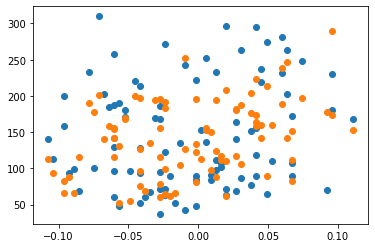

In [58]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()